In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
pst_inj_json = '../data/pst_nba_injuries_all.json'
df_injuries_raw = pd.read_json(pst_inj_json)

In [40]:
df_injuries_raw


,Date,Team,Healed,Injured,Notes
0,1899-12-30,Warriors,,Willie Cauley-Stein,illness (DTD)
1,1947-08-05,Bombers (BAA),,Jack Underman,fractured legs (in auto accident) (out indefin...
2,1948-02-15,Bullets (BAA),Harry Jeannette / Buddy Jeannette,,broken rib (DTD) (date approximate)
3,1949-11-12,Capitols,,Fred Scolari,fractured right cheekbone (out indefinitely)
4,1949-12-23,Knicks,,Vince Boryla,mumps (out ~2 weeks)
...,...,...,...,...,...
62238,2021-06-18,Jazz,Mike Conley Jr.,,activated from IL
62239,2021-06-23,Bucks,,Justin Jackson (Aaron),sprained right ankle (DTD)
62240,2021-06-23,Bucks,Jordan Nwora,,activated from IL
62241,2021-06-23,Hawks,Cameron Reddish / Cam Reddish,,activated from IL


In [36]:
from gamelogs_to_mongo import format_injury_df
df0 = pd.read_pickle('../data/df.pkl')
players = df0['bbref_id'].unique()
df_raw = format_injury_df(df0)

In [137]:
df1 = pd.read_pickle('../data/df1.pkl')

In [38]:
df_cleaned = df_raw.copy()
df_new = df_cleaned[df_cleaned.New_Inj == True].copy()
df = df_new[df_new['Date'] >= '1994-07-01']
df

,Date,player,Team,Status,Notes,bbref_id,from,to,pos,height,...,age,Season,Return_Date,Inj_Duration,New_Inj,Out_of_NBA,Career,League_Years,Num_Inj_Career,Num_Inj_Season
1597,1994-07-06,Patrick Ewing,Knicks,Injured,arthroscopic surgery on knee (out 6-8 weeks),ewingpa01,1986,2002,C-F,84,...,31.92,1994,1994-11-04,121 days,1,0,0,8,4,1
1598,1994-08-16,Brent Price,Bullets,Injured,surgery on knee to repair torn ACL (out for se...,pricebr01,1993,2002,G,73,...,25.68,1995,1995-11-03,444 days,1,0,0,2,1,1
1599,1994-08-24,Doug Christie,Lakers,Injured,surgery on left ankle to remove calcium deposi...,chrisdo01,1993,2007,G-F,78,...,24.29,1995,1994-12-27,125 days,1,0,0,2,1,1
1600,1994-08-24,John Battle,Cavaliers,Injured,surgery on left knee to remove loose cartilage...,battljo01,1986,1995,G,74,...,31.79,1995,1994-12-06,104 days,1,0,0,9,2,1
1601,1994-09-15,LaPhonso Ellis,Nuggets,Injured,stress fracture in right kneecap (out 8 weeks),ellisla01,1993,2003,F,80,...,24.36,1995,1995-04-14,211 days,1,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62219,2021-06-07,Jordan Nwora,Bucks,Injured,placed on IL with left thigh injury,nworajo01,2021,2021,F,80,...,22.74,2021,2021-06-25,18 days,1,0,0,0,2,2
62221,2021-06-08,Mike Conley,Jazz,Injured,placed on IL with strained right hamstring,conlemi01,2008,2021,G,73,...,33.66,2021,2021-06-18,10 days,1,0,0,13,46,9
62223,2021-06-09,Sam Merrill,Bucks,Injured,placed on IL with sprained right ankle,merrisa01,2021,2021,G,76,...,25.07,2021,2021-06-13,4 days,1,0,0,0,2,2
62237,2021-06-16,Chris Paul,Suns,Injured,placed on IL with COVID-19 protocols,paulch01,2006,2021,G,72,...,36.11,2021,2021-06-24,8 days,1,0,0,15,43,2


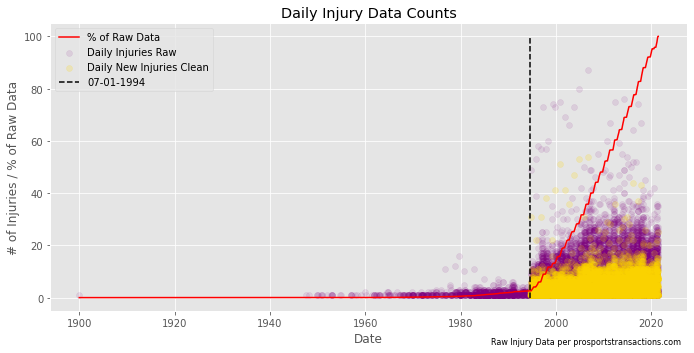

In [133]:
gby_date_count_raw = df_injuries_raw.groupby('Date').count()
gby_date_count = df.groupby('Date').count()
plt.figure(figsize=(10, 5))
plt.scatter(gby_date_count_raw.index, gby_date_count_raw['Team'], alpha=0.1, color='purple', label='Daily Injuries Raw')
plt.scatter(gby_date_count.index, gby_date_count['Team'], alpha=0.2, color='gold', label='Daily New Injuries Clean')
plt.plot(gby_date_count_raw.index, 100*gby_date_count_raw['Team'].cumsum()/len(df_injuries_raw), color='red', label='% of Raw Data')

plt.vlines(pd.Timestamp('1994-07-01'), ymin=0, ymax=100, color='black', ls='--', label='07-01-1994')
plt.title('Daily Injury Data Counts')
plt.legend()
plt.xlabel('Date')
plt.ylabel('# of Injuries / % of Raw Data')
plt.text(x=6000, y=-15, ha='left', va='top', s='Raw Injury Data per prosportstransactions.com', fontsize=8)
plt.tight_layout()
plt.savefig('../img/daily_injury_data_counts.png')
# plt.scatter(df.groupby('Date').count().index, df.groupby('Date').count()['Team'], alpha=0.2)
# plt.plot(df.groupby('Date').count().index, 100*df.groupby('Date').count()['Team'].cumsum()/len(df), color='r')

In [145]:
df1[df1.bbref_id.eq('willico02')]#&df1.Status.eq('Healed')]
temp_players = df1[df1.Notes.str.contains('IR')|df.Notes.str.contains('IL')].bbref_id.unique()

In [148]:
for player in temp_players[:10]:
    print(df1[df1.bbref_id.eq(player)][['Date', 'Notes']])

            Date                                            Notes
1557  1994-01-10      strained left hip muscle (out indefinitely)
1580  1994-02-25       placed on IR with strained left hip muscle
2819  1995-12-10            placed on IR with strained hip flexor
2901  1995-12-28                                activated from IL
4155  1996-12-11  placed on IR with strained lumbar spine muscles
4267  1996-12-26                                activated from IL
8363  1999-11-23                         sprained left knee (DNP)
8924  2000-01-24                    placed on IL with knee injury
9263  2000-03-08                                activated from IL
9582  2000-04-10        placed on IL with right knee inflammation
9713  2000-04-19                                activated from IL
9999  2000-11-14                placed on IL with sore right knee
10789 2001-01-25                                activated from IL
10851 2001-02-01                placed on IL with sore right knee
11502 2001

In [151]:
p_df0, p_df1 = df0.bbref_id.unique(), df1.bbref_id.unique()

In [158]:
for p in df1[df1.bbref_id.isin([p for p in p_df1 if p not in p_df0])].player.unique():
    print(df_injuries_raw[df_injuries_raw['Healed'].str.contains(p)])    

            Date   Team         Healed Injured              Notes
24348 2007-03-25  Bucks  Damir Markota          activated from IL
            Date  Team           Healed Injured              Notes
26040 2008-01-10  Suns  D.J. Strawberry          activated from IL
            Date     Team             Healed Injured              Notes
29631 2009-04-05  Bobcats  Dontell Jefferson          activated from IL
            Date   Team         Healed Injured        Notes
48519 2016-10-29  Magic  Arinze Onuaku          "activated"
49579 2017-01-01  Magic  Arinze Onuaku          "activated"
            Date      Team       Healed Injured               Notes
59733 2020-12-27  Pelicans  Will Magnay          returned to lineup
